In [44]:
# Read data
import pandas as pd
data=pd.read_csv('../data/data.csv')
data=data[data.birth_date.str.len()==10] #Removing incomplete dates

C:\Users\Ojas\AppData\Local\Temp\ipykernel_22872\1725432702.py:3: DtypeWarning: Columns (18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.


In [45]:
# Get the day of week for each date
data['birth_date']=pd.to_datetime(data.birth_date, errors='coerce')
data['Day of birth']=data.birth_date.dt.day_name()
data

,Unnamed: 0,gender,id,identifiers,image,images,name,birth_date,links,other_names,...,family_name,death_date,email,sort_name,honorific_prefix,honorific_suffix,national_identity,summary,patronymic_name,Day of birth
8,8,male,34352d83-6fa1-463d-a02f-6157b3adf36b,"[{'identifier': '141', 'scheme': 'everypolitic...",http://www.parlamentra.org/upload/iblock/bfe/u...,[{'url': 'http://www.parlamentra.org/upload/ib...,Убирия Бежан Михайлович,1967-03-07,"[{'note': 'Wikipedia (ru)', 'url': 'https://ru...","[{'name': 'Бежан Убириа', 'note': 'alternate'}...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday
19,19,male,9fd33b27-fd4c-4eba-9a8f-d4d23f603c63,"[{'identifier': '/m/03fqqs', 'scheme': 'freeba...",http://www.parlamentra.org/upload/iblock/e1f/s...,[{'url': 'http://www.parlamentra.org/upload/ib...,Шамба Сергей Миронович,1951-03-15,"[{'note': 'Wikipedia (ab)', 'url': 'https://ab...","[{'lang': 'ab', 'name': 'Сергеи Шамба', 'note'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday
28,28,male,da988bab-32d4-46c0-bb7b-5c6a6eb129e7,"[{'identifier': '46', 'scheme': 'everypolitici...",http://www.parlamentra.org/upload/iblock/b85/%...,[{'url': 'http://www.parlamentra.org/upload/ib...,Бганба Валерий Рамшухович,1953-08-26,"[{'note': 'Wikimedia Commons', 'url': 'https:/...","[{'lang': 'cs', 'name': 'Valerij Bganba', 'not...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday
113,78,female,522dff9d-d21d-41b9-a7d5-c2321c819b11,"[{'identifier': '1854', 'scheme': 'everypoliti...",http://www.wolesi.website/Media/Images/mine/fa...,[{'url': 'http://www.wolesi.website/Media/Imag...,Farkhunda Zahra Naderi-Kabul,1981-04-19,"[{'note': 'Wikimedia Commons', 'url': 'https:/...","[{'lang': 'en', 'name': 'Farkhunda Zahra Nader...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday
207,172,female,aac6f415-446d-4070-80d9-195d4f7b77ac,"[{'identifier': '1823', 'scheme': 'everypoliti...",http://www.wolesi.website/Media/Images/mine/ra...,[{'url': 'http://www.wolesi.website/Media/Imag...,Rangina Kargar-Faryab,1985-03-22,"[{'note': 'Wikimedia Commons', 'url': 'https:/...","[{'lang': 'en', 'name': 'Rangina Kargar', 'not...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78373,51,female,e57828f1-e51a-41ea-a61b-7fc1b92e2b37,"[{'identifier': '109', 'scheme': 'everypolitic...",http://www.lagtinget.ax/files/dahl_ulla_britt.jpg,[{'url': 'http://www.lagtinget.ax/files/dahl_u...,Dahl Ulla-Britt,1946-03-14,"[{'note': 'Wikipedia (fi)', 'url': 'https://fi...","[{'lang': 'en', 'name': 'Ulla-Britt Dahl', 'no...",...,Dahl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday
78374,52,male,e6f6e01b-bcb0-4374-8912-7e1eaf492f10,"[{'identifier': '97', 'scheme': 'everypolitici...",http://www.lagtinget.ax/files/lindfors_henry.jpg,[{'url': 'http://www.lagtinget.ax/files/lindfo...,Lindström Henry,1956-06-20,"[{'note': 'Wikipedia (fi)', 'url': 'https://fi...","[{'lang': 'en', 'name': 'Henry Lindström', 'no...",...,Lindström,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday
78377,55,male,ed4838aa-19f8-493c-b8c4-58780b5b0d84,"[{'identifier': '112', 'scheme': 'everypolitic...",http://www.lagtinget.ax/files/sjolund_folke.jpg,[{'url': 'http://www.lagtinget.ax/files/sjolun...,Sjölund Folke,1943-12-16,"[{'note': 'Wikipedia (fi)', 'url': 'https://fi...","[{'lang': 'en', 'name': 'Folke Sjölund', 'note...",...,Sjölund,2013-12-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday
78379,57,male,f4f995ae-126c-468f-8f26-deec1e26adc2,"[{'identifier': '372', 'scheme': 'everypolitic...",http://www.lagtinget.ax/files/asumaa_tony.jpg,[{'url': 'http://www.lagtinget.ax/files/asumaa...,Asumaa Tony,1968-09-15,"[{'note': 'Wikipedia (en)', 'url': 'https://en...","[{'lang': 'en', 'name': 'Tony Asumaa', 'note':...",...,Asumaa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday


In [46]:
# Get counts of each day
daily=data.groupby('Day of birth').count()[['name']]
daily

,name
Day of birth,
Friday,6383
Monday,6451
Saturday,6167
Sunday,6095
Thursday,6273
Tuesday,6276
Wednesday,6328


In [47]:
# Add percentage & prepare for plotting
daily['percentage']=daily.name/daily.name.sum()*100
daily['percentage']=daily['percentage'].round(2)
daily=daily.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
daily.index=pd.CategoricalIndex(daily.index, categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered=True)

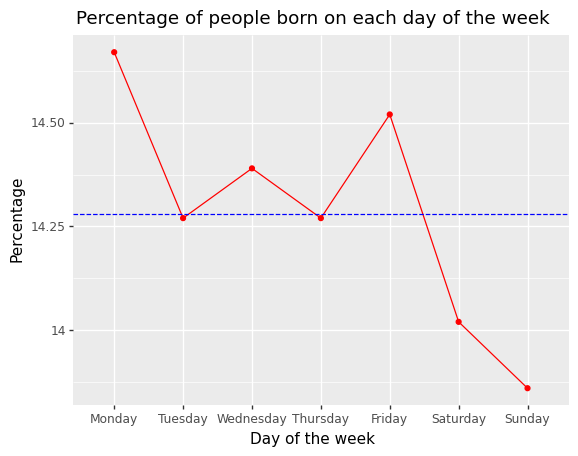

<ggplot: (193309860819)>

In [48]:
# Plot
from plotnine import *
ggplot(daily, aes(x=daily.index, y='percentage', group=1))\
    +geom_line(aes(y='percentage'), color='red')\
    +geom_point(aes(y='percentage'), color='red')\
    +geom_hline(yintercept=14.28, linetype='dashed', color='blue')\
    +labs(title='Percentage of people born on each day of the week', x='Day of the week', y='Percentage')

## UK Analysis

Using population data from ONS

In [49]:
# MPs data
uk_data=data[data.country=='United Kingdom']
uk_daily=uk_data.groupby('Day of birth').count()[['name']]
uk_daily['percentage']=uk_daily.name/uk_daily.name.sum()*100
uk_daily['percentage']=uk_daily['percentage'].round(2)
uk_daily=uk_daily.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
uk_daily

,name,percentage
Day of birth,,
Monday,201,14.14
Tuesday,191,13.43
Wednesday,195,13.71
Thursday,220,15.47
Friday,207,14.56
Saturday,207,14.56
Sunday,201,14.14


In [50]:
# Population data
uk_births_daily=pd.read_csv('../data/UK_2018_births_by_day.csv', index_col=0)
uk_births_daily=pd.DataFrame(uk_births_daily.mean(axis=0).round(2))
uk_births_daily

,0
Monday,14.36
Tuesday,14.96
Wednesday,15.10
Thursday,15.30
Friday,15.22
Saturday,12.91
Sunday,12.15


In [51]:
# Merge data
uk_daily=uk_daily.merge(uk_births_daily, left_index=True, right_index=True)
uk_daily.columns=['Count','Percentage','Births']
uk_daily.index=pd.CategoricalIndex(uk_daily.index, categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered=True)
uk_daily['Percentage Difference']=(uk_daily['Percentage']-uk_daily['Births'])/uk_daily['Births']*100
uk_daily

,Count,Percentage,Births,Percentage Difference
Monday,201,14.14,14.36,-1.532033
Tuesday,191,13.43,14.96,-10.227273
Wednesday,195,13.71,15.10,-9.205298
Thursday,220,15.47,15.30,1.111111
Friday,207,14.56,15.22,-4.336399
Saturday,207,14.56,12.91,12.780790
Sunday,201,14.14,12.15,16.378601


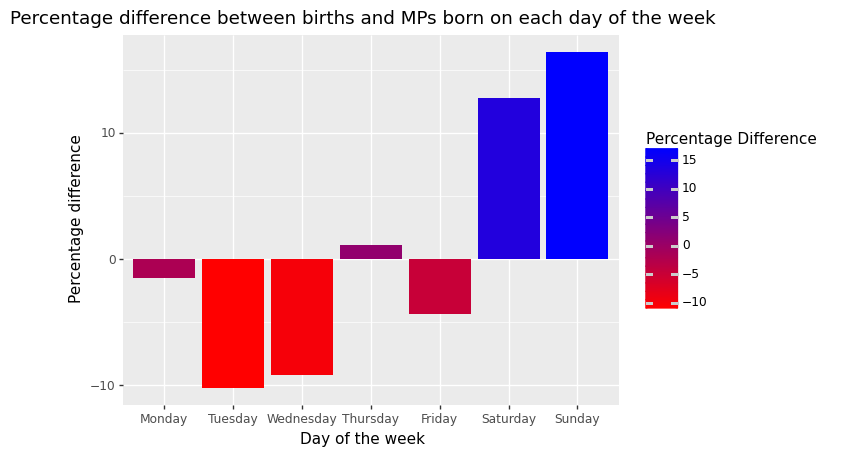

<ggplot: (193322102001)>

In [52]:
# Plot of percentage difference
ggplot(uk_daily, aes(x=uk_daily.index, y='Percentage Difference', fill='Percentage Difference'))\
+ geom_bar(stat='identity')\
+ labs(title='Percentage difference between births and MPs born on each day of the week', x='Day of the week', y='Percentage difference')\
+ scale_fill_gradient(low='red', high='blue')


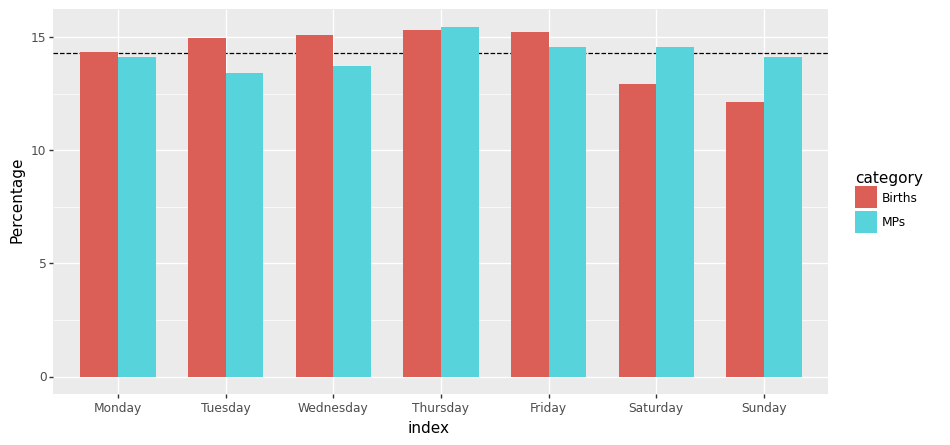

<ggplot: (193320423674)>

In [53]:
# Double bar plot

# Prepare data
df_for_double_plot=pd.concat([uk_daily[['Percentage']], uk_daily[['Births']].rename(columns={'Births':'Percentage'})], axis=0).reset_index()
df_for_double_plot['category']=['MPs' if x<7 else 'Births' for x in range(14)]

# Plot
ggplot(df_for_double_plot, aes(x='index', y='Percentage', fill='category'))\
+ geom_hline(yintercept=14.28, linetype='dashed', color='black')\
+ geom_bar(stat='identity', position='dodge', width=0.7)\
+ theme(figure_size=(10,5))
